# Lab work #1
# Danylo Kiriienko
# Group No KC31

# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

arrests = pd.read_csv("D:/Uknord5he/BH3/ml_course/1/Arrest_Data_from_2020_to_Present.csv")
arrests = arrests.dropna(how="all")
arrests = arrests.fillna(arrests.mean(numeric_only=True))
arrests = arrests.drop_duplicates()

cat_cols = ["Sex Code", "Descent Code", "Charge Group Code"]
arrests = pd.get_dummies(arrests, columns=cat_cols, drop_first=True, sparse=True)

scaler = StandardScaler()
numeric = arrests.select_dtypes(include="number")
arrests[numeric.columns] = scaler.fit_transform(numeric)

arrests.to_csv("D:/Uknord5he/BH3/ml_course/1/arrest_cleaned.csv", index=False)


## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

Report ID                               4.077513e-18
Time                                    1.907936e-16
Area ID                                -5.844435e-17
Reporting District                     -8.919560e-17
Age                                     2.743826e-16
LAT                                     1.718672e-15
LON                                    -1.004088e-15
Booking Time                            3.386035e-16
Booking Location Code                  -2.494334e-14
Sex Code_M                              7.961725e-01
Descent Code_B                          2.712739e-01
Descent Code_C                          5.469593e-04
Descent Code_D                          5.977697e-06
Descent Code_F                          5.200597e-04
Descent Code_G                          1.554201e-04
Descent Code_H                          5.134543e-01
Descent Code_I                          7.771006e-05
Descent Code_J                          6.874352e-05
Descent Code_K                          3.9153

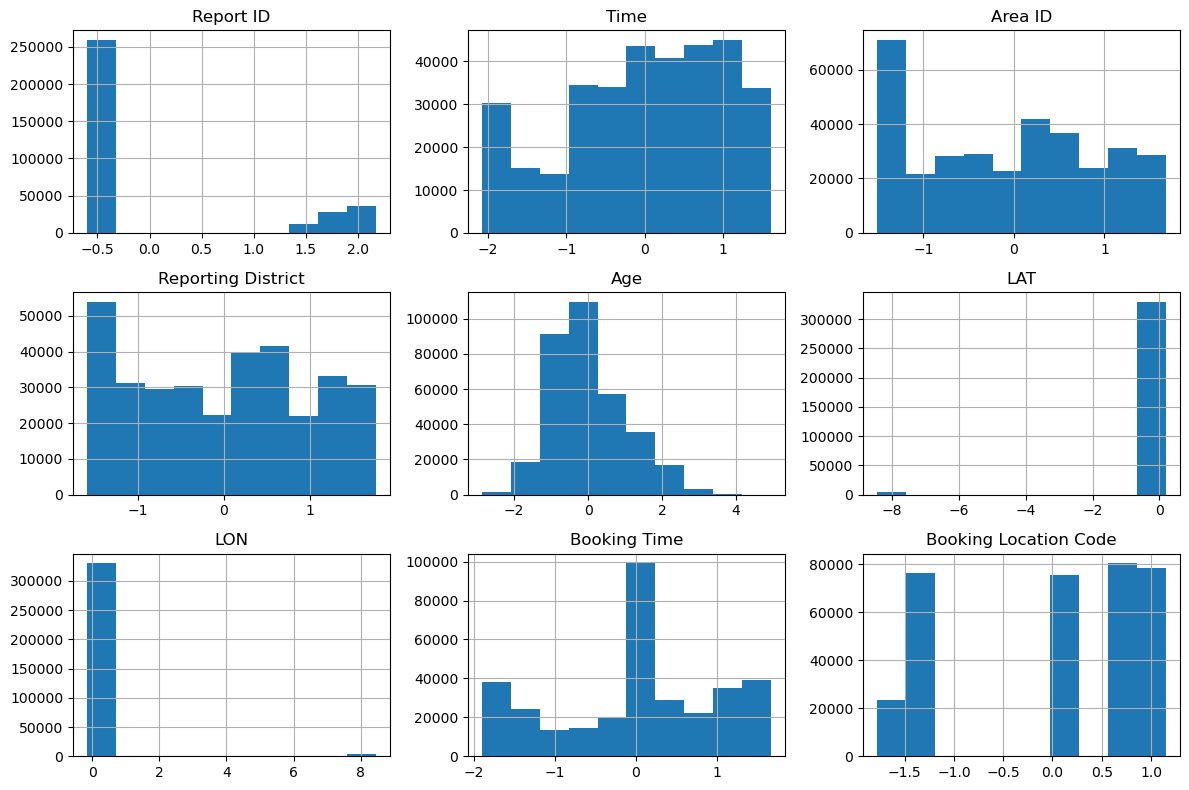

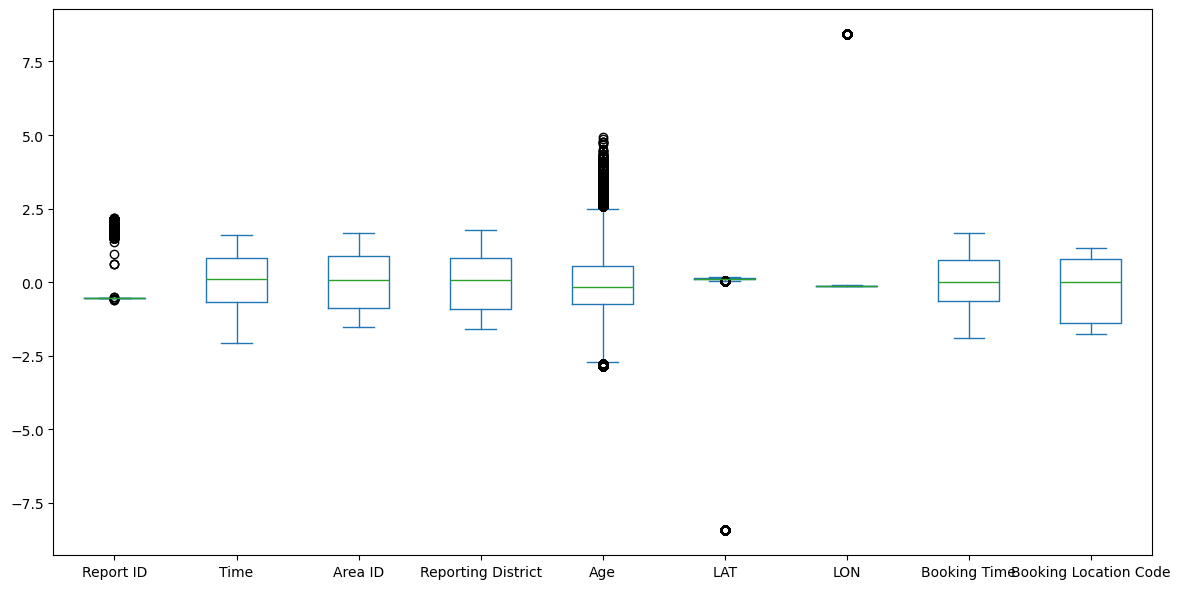

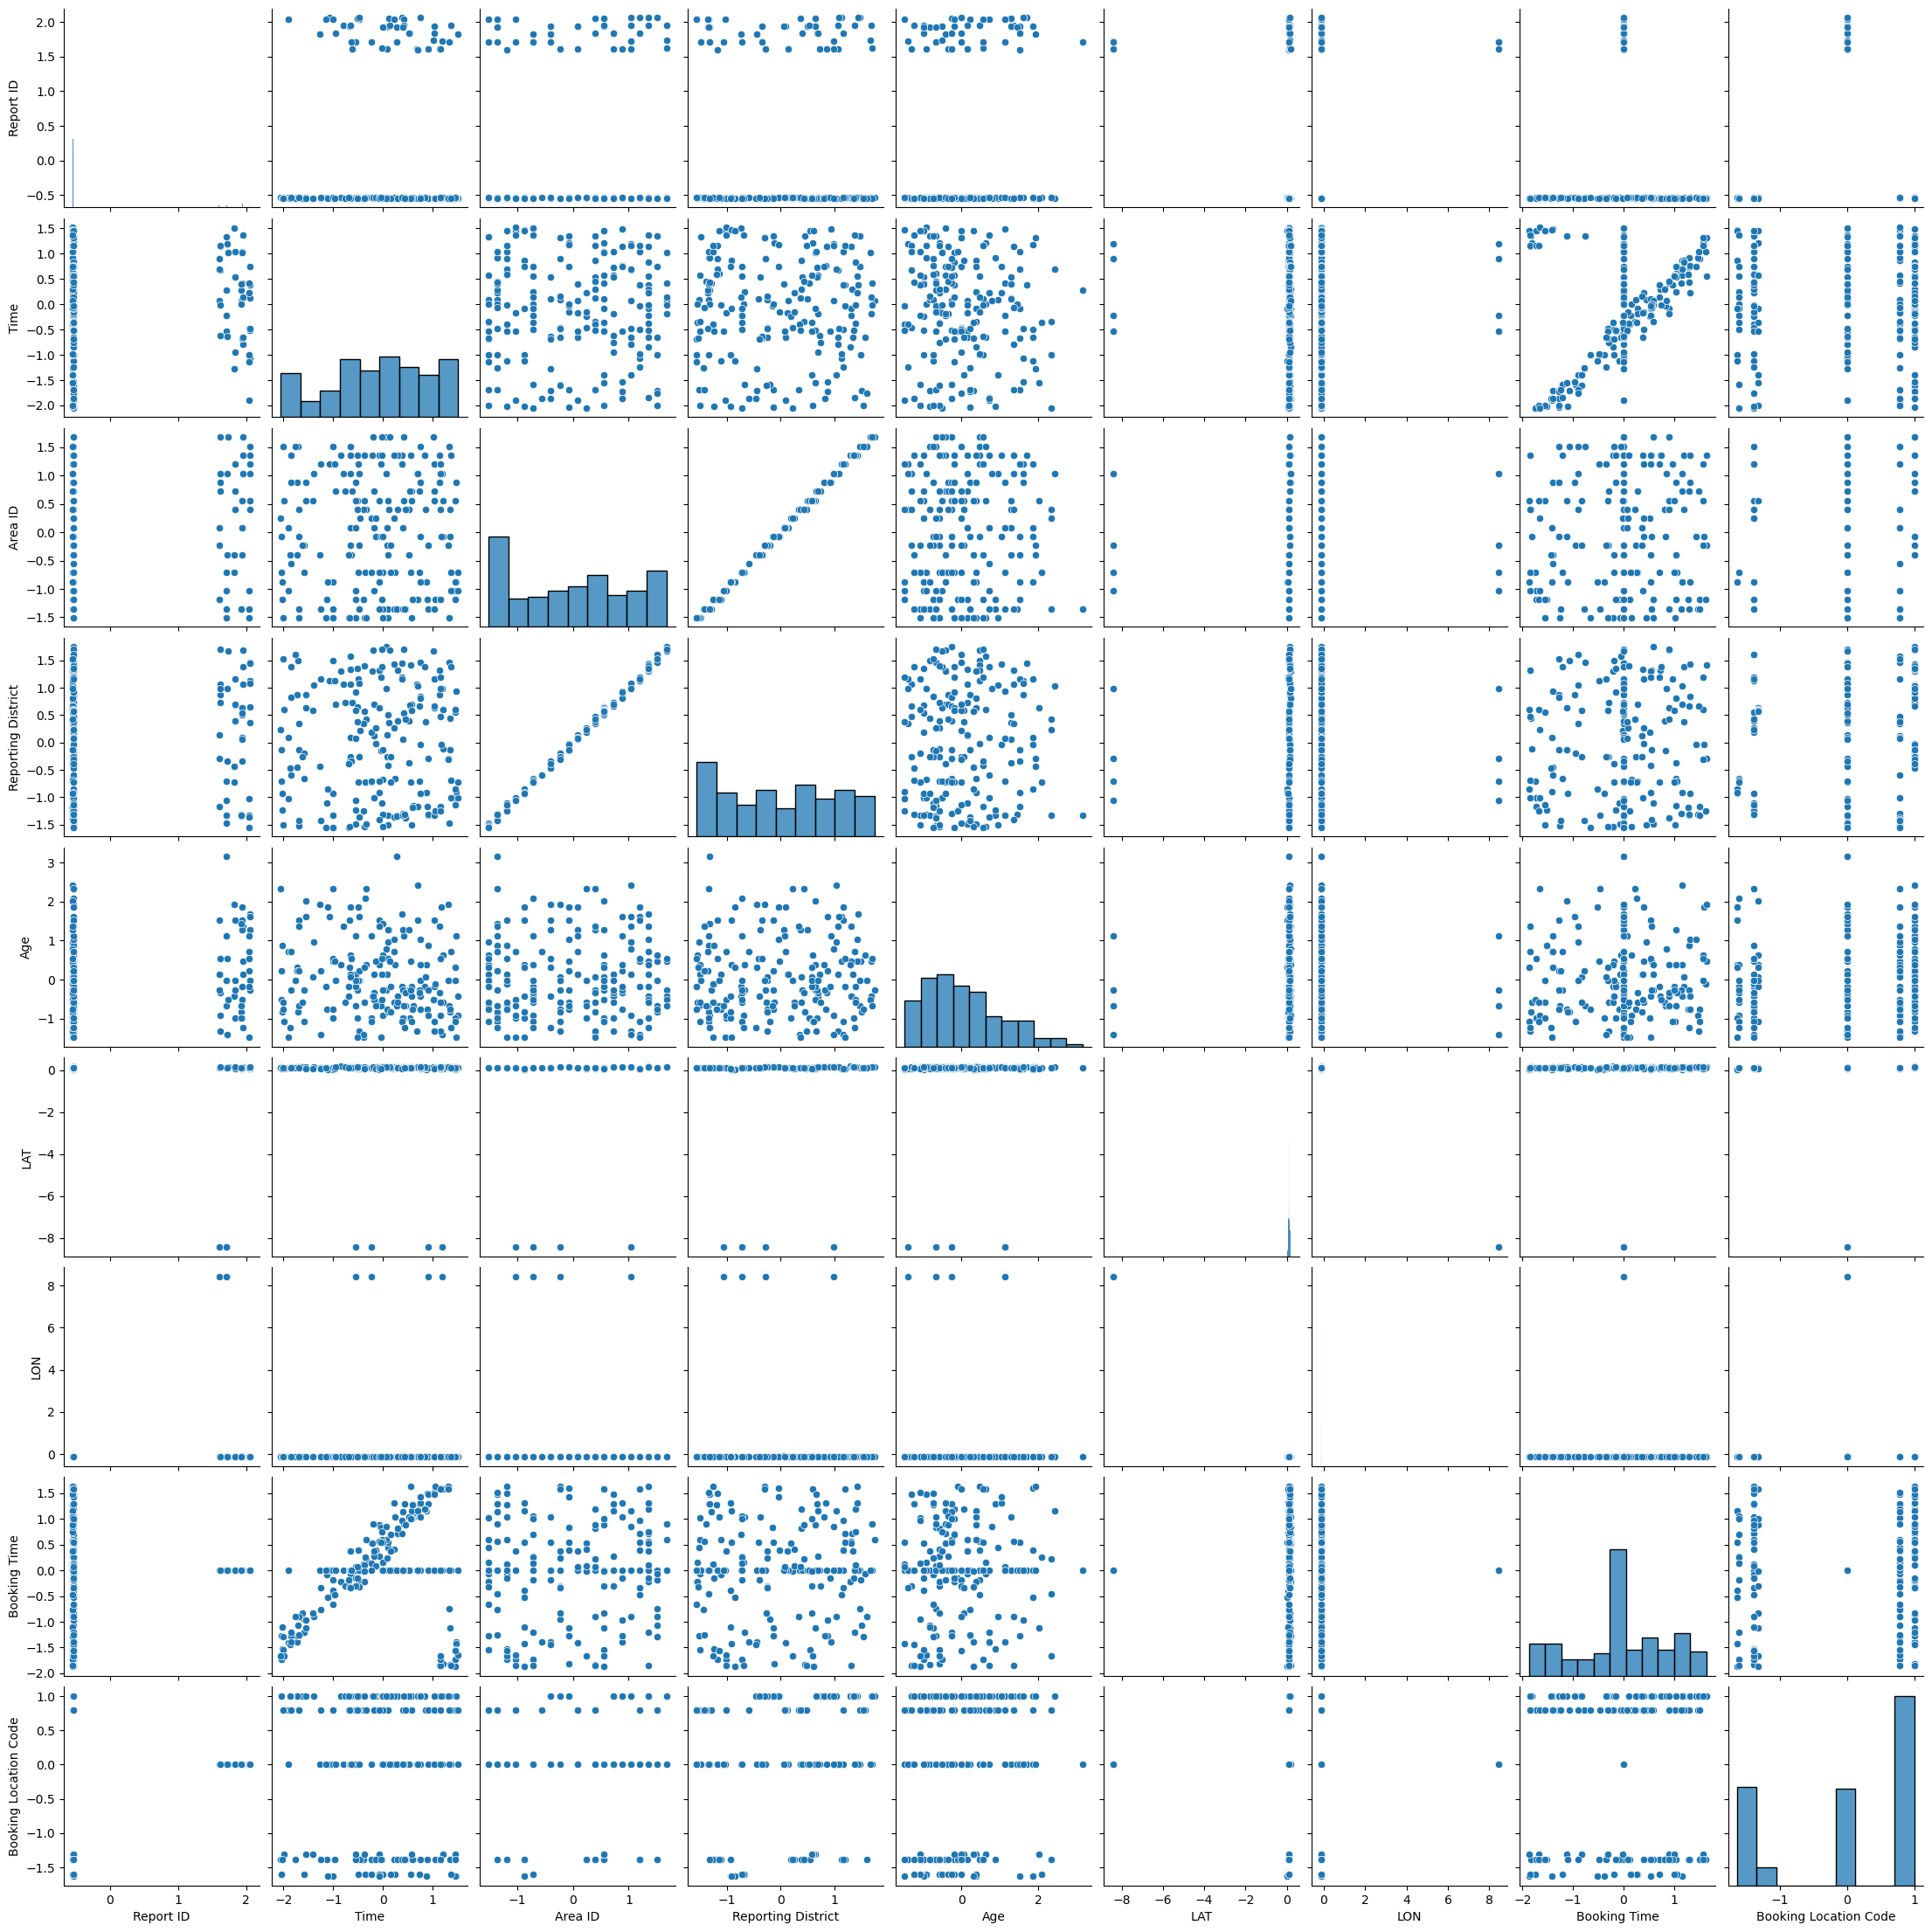

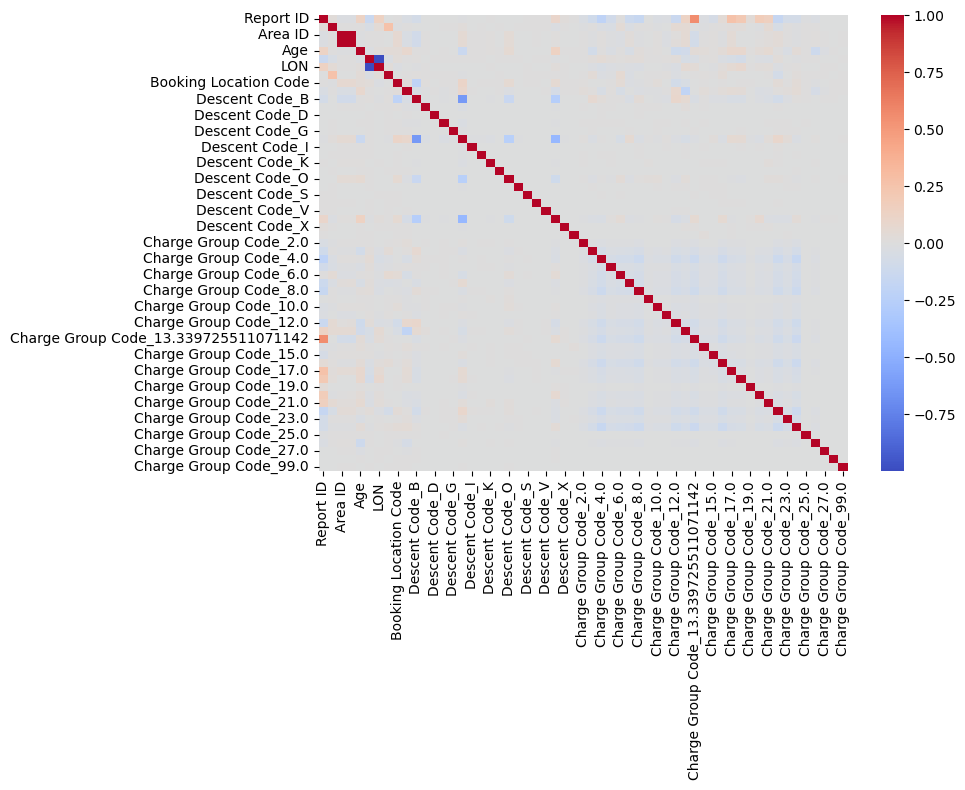

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrests = pd.read_csv("D:/Uknord5he/BH3/ml_course/1/arrest_cleaned.csv")

print(arrests.mean(numeric_only=True))
print(arrests.median(numeric_only=True))
print(arrests.mode(numeric_only=True).iloc[0])
print(arrests.std(numeric_only=True))

arrests.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

arrests.plot.box(figsize=(12, 6))
plt.tight_layout()
plt.show()

sns.pairplot(arrests.select_dtypes(include="number").sample(200))
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(arrests.corr(numeric_only=True), annot=False, cmap="coolwarm", fmt=".2f")
plt.tight_layout()
plt.show()


## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

age_group
average     150332
old          84684
very old     55892
young        43669
Name: count, dtype: int64
is_lat_lon_zero
0    334577
Name: count, dtype: int64


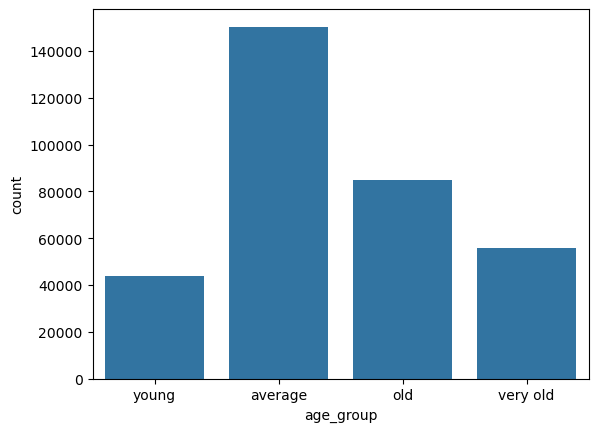

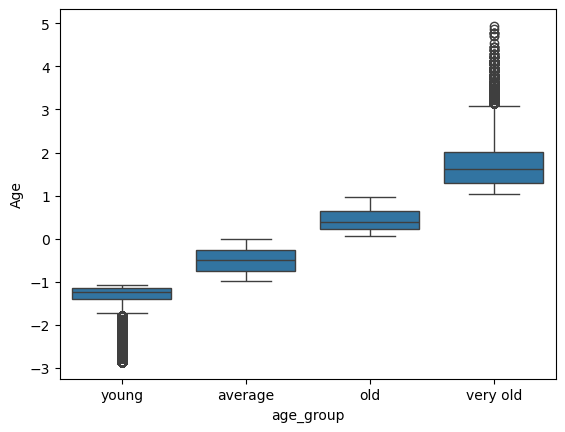

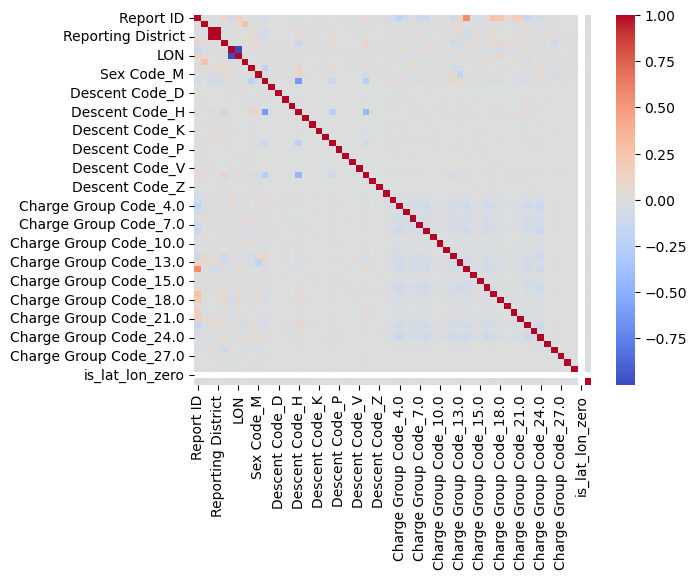

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrests = pd.read_csv("D:/Uknord5he/BH3/ml_course/1/arrest_cleaned.csv")
arrests["age_group"] = pd.cut(arrests["Age"], bins=[-float("inf"), -1.0, 0.0, 1.0, float("inf")],labels=["young", "average", "old", "very old"])
arrests["is_lat_lon_zero"] = ((arrests["LAT"] == 0) & (arrests["LON"] == 0)).astype(int)
arrests["area_time_interaction"] = arrests["Area ID"] * arrests["Time"]
print(arrests["age_group"].value_counts())
print(arrests["is_lat_lon_zero"].value_counts())

sns.countplot(x="age_group", data=arrests)
plt.show()

sns.boxplot(x="age_group", y="Age", data=arrests)
plt.show()

sns.heatmap(arrests.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()


## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

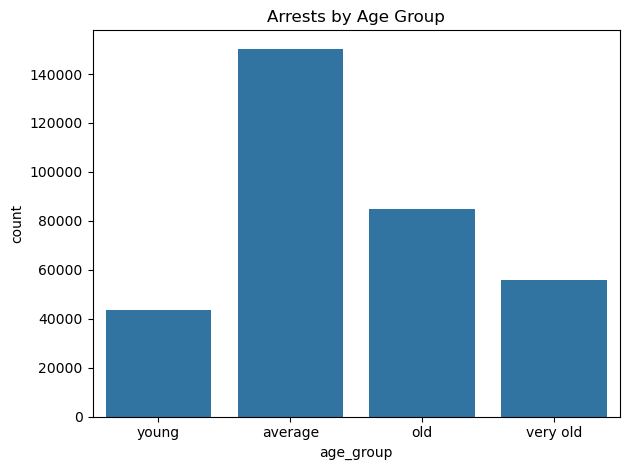

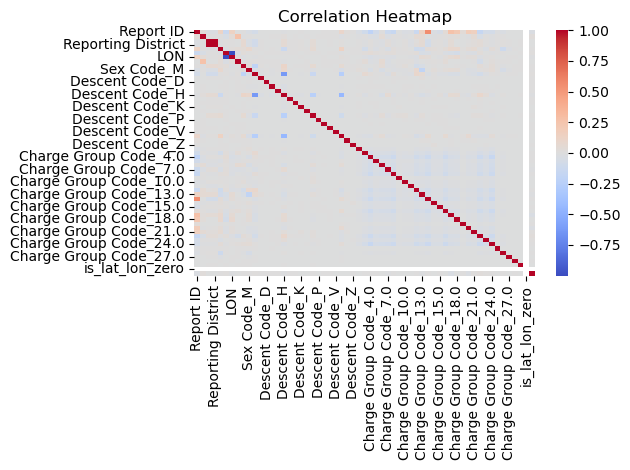

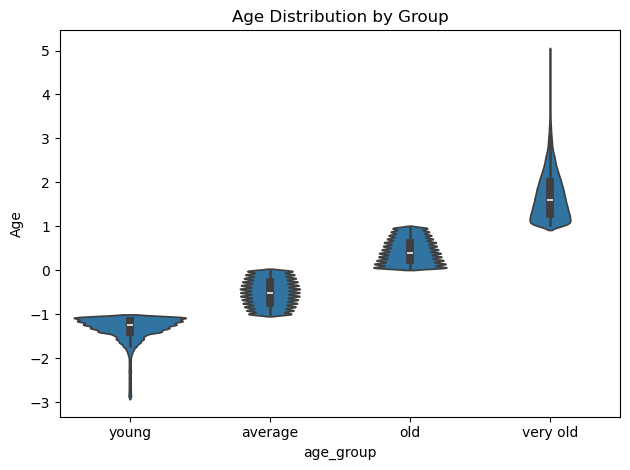

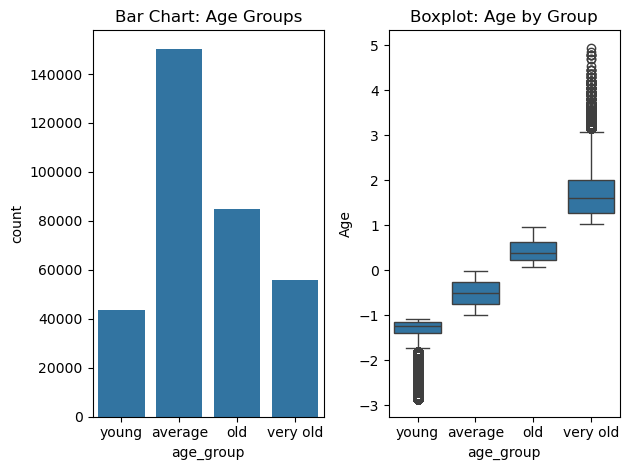

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrests = pd.read_csv("D:/Uknord5he/BH3/ml_course/1/arrest_cleaned.csv")
arrests["age_group"] = pd.cut(arrests["Age"], bins=[-float("inf"), -1.0, 0.0, 1.0, float("inf")],labels=["young", "average", "old", "very old"])
arrests["is_lat_lon_zero"] = ((arrests["LAT"] == 0) & (arrests["LON"] == 0)).astype(int)
arrests["area_time_interaction"] = arrests["Area ID"] * arrests["Time"]
plt.figure()
sns.countplot(x="age_group", data=arrests)
plt.title("Arrests by Age Group")
plt.tight_layout()
plt.show()
#pustyshka
if "Date" in arrests.columns:
    arrests["Date"] = pd.to_datetime(arrests["Date"])
    trend = arrests.groupby(arrests["Date"].dt.to_period("M")).size()
    trend.index = trend.index.to_timestamp()
    trend.plot(title="Arrests Over Time")
    plt.tight_layout()
    plt.show()

plt.figure()
sns.heatmap(arrests.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.figure()
sns.violinplot(x="age_group", y="Age", data=arrests)
plt.title("Age Distribution by Group")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2,)
sns.countplot(x="age_group", data=arrests, ax=axs[0])
axs[0].set_title("Bar Chart: Age Groups")
sns.boxplot(x="age_group", y="Age", data=arrests, ax=axs[1])
axs[1].set_title("Boxplot: Age by Group")
plt.tight_layout()
plt.show()
